In [12]:
import pandas as pd
import numpy as np
import pylab as plt

In [32]:
ssp_paths = pd.read_csv(r'/shared/netscratch/znjs2/SSP_RCP_ch4/ssp_paths.csv',sep=',',index_col=0)
ssp_paths.columns = ['SSP__1','SSP_2','SSP_3','SSP_4','SSP_5']

In [33]:
print(ssp_paths)

        SSP__1     SSP_2     SSP_3     SSP_4     SSP_5
2005  1753.160  1753.160  1753.160  1753.160  1753.160
2010  1812.864  1812.864  1812.864  1812.864  1812.864
2020  1888.198  1898.442  1958.352  1945.321  1927.944
2030  1919.771  1951.761  2136.883  2117.301  2077.052
2040  1935.294  1995.014  2314.385  2304.988  2305.153
2050  1915.280  2022.441  2478.770  2451.961  2565.794
2060  1864.652  2046.626  2634.316  2554.269  2748.008
2070  1797.688  2070.316  2785.519  2632.626  2821.259
2080  1708.398  2081.128  2936.525  2671.109  2807.665
2090  1610.532  2076.744  3087.259  2675.739  2721.972
2100  1526.825  2053.971  3238.033  2668.365  2598.510


In [34]:
pre_i_ch4 = np.full((11),750)
ssp_paths["pre_industrial"] = pre_i_ch4

Text(0.5, 1.0, 'SSP pathways for methane')

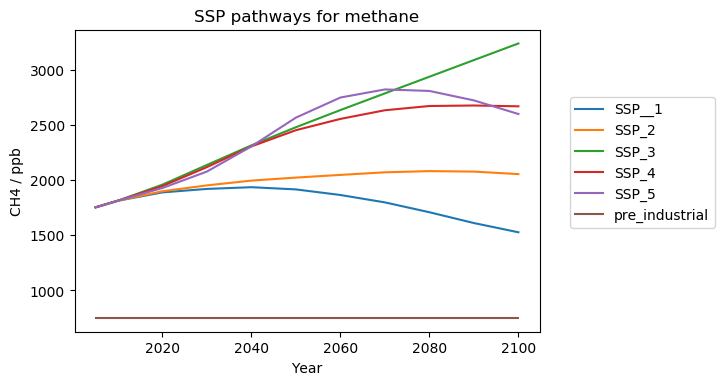

In [39]:
fig = plt.figure(dpi=100)
ax = plt.axes()

for i in range(6):
    ax.plot(ssp_paths.index, ssp_paths.iloc[:,i], label=f'{ssp_paths.columns.values[i]}')

plt.legend(bbox_to_anchor=(1.05, 0.8))
plt.xlabel('Year')
plt.ylabel('CH4 / ppb')
plt.title(f'SSP pathways for methane')

Text(0.5, 1.0, 'CH4 conc pathways')

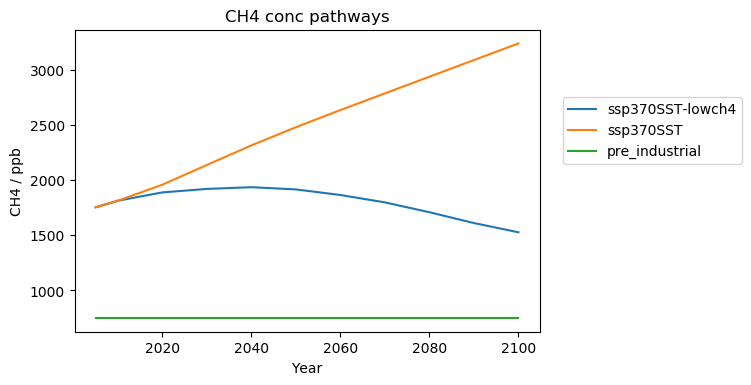

In [50]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(ssp_paths.index, ssp_paths.iloc[:,0], label=f'ssp370SST-lowch4')
ax.plot(ssp_paths.index, ssp_paths.iloc[:,2], label=f'ssp370SST')
ax.plot(ssp_paths.index, ssp_paths.iloc[:,5], label=f'{ssp_paths.columns.values[5]}')

plt.legend(bbox_to_anchor=(1.45, 0.8))
plt.xlabel('Year')
plt.ylabel('CH4 / ppb')
plt.title(f'CH4 conc pathways')